# Домашнее задание к модулям 9_3 & 10_3: The Quest For A Better Network

В этом домашнем задании вам предстоит построить свою сверточную нейронную сеть для решения задачи <a href="https://www.kaggle.com/c/tiny-imagenet">Tiny ImageNet</a>.

(please read it at least diagonally)

* Цель — построить нейронную сеть и обучить ее на тренировочной части датасета так, чтобы она давала наибольший accuracy на тестовой части датасета.
* В конце данного ноутбука нужно будет написать мини-отчет о том, какие эксперименты вы делали, что пробовали, что получилось/что не получилось и т.п.

Отчет — это ОЧЕНЬ важно! Это культура экспериментов ML & DL, которая пригодится вам на любой работе, связанной с ML/DL. Также помогает организовать свои эксперименты так, чтобы с кодом было проще работать и он был воспроизводим.
 
## Оценивание
* не сделанное дз — 0 баллов
* +20% за хороший репорт о ваших попытках решения, написанный в конце ноутбука;
* +20% за построение нейронной сети, которая бьет порог 20% accuracy на тестовой выборке;
    * +10% за побитие каждого из следующих бейзланов accuracy на тестовом датасете:
    * 25% (50% от макс. оценки)
    * 30% (60% от макс. оценки)
    * 32.5% (70% от макс. оценки)
    * 35% (80% от макс. оценки)
    * 37.5% (90% от макс. оценки)
    * 40% (макс. оценка)
    
## Требования
* Пожалуйста, НЕ используйте предобученные нейронные сети до того, как вы побьете бейзлайн в 40% на тесте. Как только получили 40%, можете делать все, что хотите.
* валидационную часть датасета нельзя исполтзовать ни в каком месте обучения сети, кроме как в валидации сети в процессе обучения. 

## Идеи, что можно попробовать сделать:


 * __Network size__
   * больше нейронов, больше слоев! =D (https://pytorch.org/docs/stable/nn.html)

   * Различные нелинейности (активации) в промежуточных слоях:
     * tanh, relu, leaky relu, etc
   * Обратите внимание, что сети с большим количеством параметров (слоев и нейронов) могут сходиться за большее количество эпох. Другими словами, большой сетке может понадобиться больше эпох, чтобы получить больший скор. В общем, не ставьте крест на своей сети, если она после 5 эпох обучения не выдала вам хороший результат. 


### Главное правило: одно изменение за один раз!
   * Наверняка у вас в голове уже шквал идей, которые можео попробовать. И, конечно, пробуйте! Но есть одно правило: __никогда не пробуйте их все одновременно__. Если вы меняете сразу два параметра сети: скажем, активацию промежуточных слоев с tanh на relu и количество слоев сети с 3 до 5, и ваша сеть получает на 4% accuracy больше, то вы не сможете сказать, какое именно из изменений повлияло на сеть в лучшую сторону. Попробуйте поменять сначала одно, потом второе, зафиксируйте изменения после каждой попытки.


### Обучение
   * Обучать любую (и маленькую, и большую) сеть ровно 100 эпох — это, очевидно, плохая идея. Некоторым сетям нужно 5 эпох, чтобы сойтись в минимум, некоторым -- 500.
   * Что с этим можно сделать: early stopping (https://en.wikipedia.org/wiki/Early_stopping): останавлявать обучение в зависимости от поведении сети на валидационной выборке. Например, как только сеть на протяжении 5 последовательных эпох не улучшает скор, останавливат обучение.
   * Optimizers: кроме заезженного adam можно пробовать и другие =)
     * rmsprop, nesterov_momentum, adam, adagrad, etc.
     * есть смысл также настраивать momentum, alpha/beta параметры оптимизаторов.
     * но я бы советовала играться с оптимизаторами после того, как вы попробовали остальные более очевидные вещи.
   * __BatchNormalization__ (nn.BatchNorm2d)!
   * __Регуляризация__ чтобы снизить переобучение
     * Dropout (`nn.Dropout`)
       * Но не переусердствуйте. Проверьте, действительно ли дропаут помогает вашей сети, не засовывайте его везде просто чтобы был.
     * L2-регуляризация на веса сети
       * Можно написать руками или так, как в примере [тут](https://discuss.pytorch.org/t/simple-l2-regularization/139/2). Это тоже работающий трюк, который используется даже в самых крутых современных сетях.
   
### Арзитектура сети
   * Это задание __можно__ сделать, построив простую сверточную нейронную сеть вида conv-fc, поигравшись с активациями и BN Но не нужно сотанавливаться только на такой архитектуре!.
   * [Inception family](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/), [ResNet family](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035?gi=9018057983ca), [Densely-connected convolutions](https://arxiv.org/abs/1608.06993), [Capsule networks](https://arxiv.org/abs/1710.09829)
   * Пожалуйста, прежде чем натаскивать на задачу монстров вроде ResNet-152, попробуйте сетки размером поменьше. Не заставляйте себя ждать обучения огромной сети уже с первых минут делания дз.
   * Pooling'и
   * Чтобы уменьшить время работы сети, можно использовать разные значения размеров фильтров и stride.
 
   
### Аугментация данных
   * Самый лучший способ делать аугментацию — использовать torchvision transforms:
    ```
    transform_train = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    ```
   * Но: будьте реалистами: делать вертикальный flip на картинки с собачками (т.е. переворачивать собачку вверх ногами в процессе обучения) кажется не самым адекватным вариантом аугментации =)
   
   * Также можно использовать другие библиотеки для аугментации (но тогда ее придется писать руками):
   
     * ```from scipy.misc import imrotate,imresize```
     * cv2, skimake, PIL/Pillow
 * Идеи аугментаций для начала: 
     * Zoom-in+slice = move
     * Rotate+zoom(zoom тут чтобы убрать черные полоски, которые появятся в углах картинки после поворота)
     * Добавить шум (gaussian or bernoulli)
   
   


# Загрузка данных

In [ ]:
!nvidia-smi

Thu Oct  8 13:58:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/mmad_mipt/hw_b3/hw3')

sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/My Drive/Colab Notebooks/mmad_mipt/hw_b3/hw3']

Я решил сразу обучать на полном тесте (100000), а на валидации смотреть метрику точности


In [ ]:
from modules.tiny_img import download_tinyImg200
data_path = ' '
download_tinyImg200(data_path)
dataset = torchvision.datasets.ImageFolder('tiny-imagenet-200/train', transform=torchvision.transforms.ToTensor())

 /tiny-imagenet-200.zip


In [ ]:
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [int(len(dataset) * 0.8), len(dataset) - int(len(dataset) * 0.8)], generator=torch.Generator().manual_seed(42))

In [ ]:
# проверим, всё ли скачалось и правильно ли засплитилось

len(train_dataset), len(val_dataset)

(80000, 20000)

In [ ]:
# создадим даталодеры

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=True)

In [ ]:
dataiter = iter(train_loader)
# батч картинок и батч ответов к картинкам
images, labels = dataiter.next()

In [ ]:
# размерность одного батча

images.shape, labels.shape

(torch.Size([256, 3, 64, 64]), torch.Size([256]))

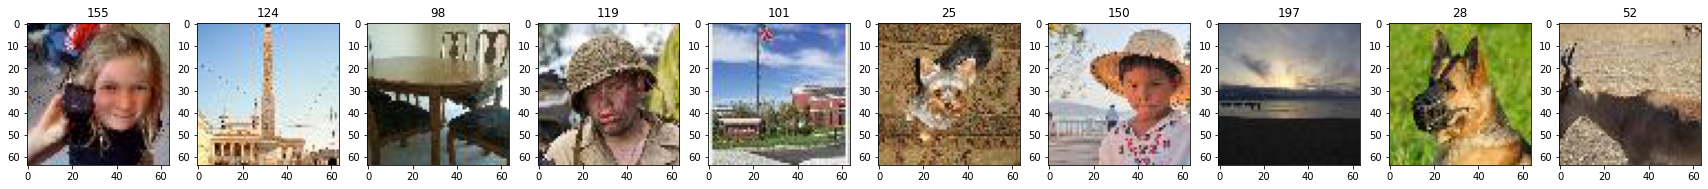

In [ ]:
# отобразим несколько картинок

def show_imgs(imgs, labels):
    f, axes= plt.subplots(1, 10, figsize=(30,5))
    for i, axis in enumerate(axes):
      axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
      axes[i].set_title(labels[i].numpy())
    plt.show()

show_imgs(images, labels)

In [ ]:
dataiter = iter(test_loader)
# батч картинок и батч ответов к картинкам
images, labels = dataiter.next()

In [ ]:
images.shape, labels.shape

(torch.Size([256, 3, 64, 64]), torch.Size([256]))

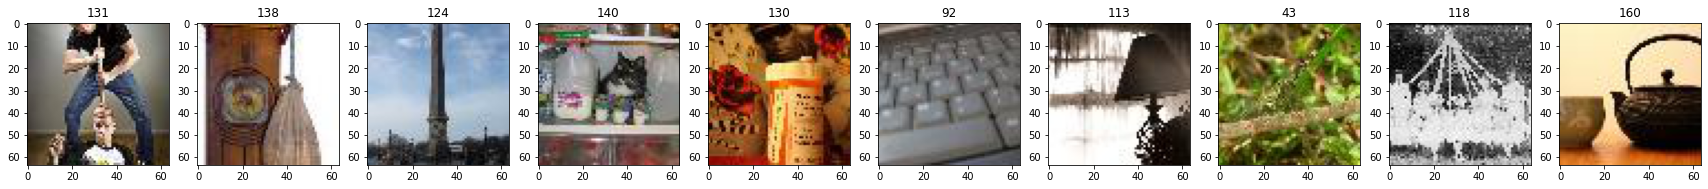

In [ ]:
show_imgs(images, labels)

# CNN


In [120]:
from tqdm import tqdm_notebook

def train(net, train, n_epoch=10):

  loss_fn = torch.nn.CrossEntropyLoss()

  learning_rate = 1e-3
  optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

  for epoch in tqdm_notebook(range(n_epoch)):

        running_loss = 0.0
        train_dataiter = iter(train)
        for i, batch in enumerate(tqdm_notebook(train_dataiter)):
           
            X_batch, y_batch = batch
            X_batch = X_batch.cuda()
            y_batch = y_batch.cuda()
           
            optimizer.zero_grad()

            
            y_pred = net(X_batch)
       
            loss = loss_fn(y_pred, y_batch)
            
            loss.backward()
           
            optimizer.step()

           
            running_loss += loss.item()
           
            if i % 100 == 99:
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

  print('Обучение закончено')
  return net

In [ ]:
from sklearn.metrics import accuracy_score

# тест модели

def test_score(net, test):

    with torch.no_grad():

        test_dataiter = iter(test)

        test_accuracy = 0

        y_pred =[]
        y_true = []

        for batch in test_dataiter:

            X_batch, y_batch = batch
            y_pred.extend(np.argmax(net.forward(X_batch.cuda()).detach().cpu().numpy(), axis=1))
            y_true.extend(y_batch)

        test_accuracy = accuracy_score(y_pred, y_true)

    return test_accuracy

## CNN1

Для начала попробуем простенькую сверточную сеть с  занятия, чтобы был ориентир по точности, которую будем улучшать.

In [ ]:
# CNN с занятия 

class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class ConvNet1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 20, kernel_size=3)
        self.maxpool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(20, 3, kernel_size=3) 
        self.flatten = Flatten()
        self.fc = nn.Linear(2523,200)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        
        x = self.flatten(x)
        x = self.fc(x)
        return x

In [ ]:
model = ConvNet1().cuda()
print(model)

ConvNet1(
  (conv1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 3, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten()
  (fc): Linear(in_features=2523, out_features=200, bias=True)
)


In [ ]:
model = train(model,train_loader, n_epoch=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


[1,   100] loss: 5.192
[1,   200] loss: 5.018
[1,   300] loss: 4.941



[2,   100] loss: 4.819
[2,   200] loss: 4.806
[2,   300] loss: 4.800



[3,   100] loss: 4.640
[3,   200] loss: 4.607
[3,   300] loss: 4.569



[4,   100] loss: 4.369
[4,   200] loss: 4.368
[4,   300] loss: 4.375



[5,   100] loss: 4.171
[5,   200] loss: 4.220
[5,   300] loss: 4.229



[6,   100] loss: 4.020
[6,   200] loss: 4.057
[6,   300] loss: 4.080



[7,   100] loss: 3.847
[7,   200] loss: 3.893
[7,   300] loss: 3.939



[8,   100] loss: 3.657
[8,   200] loss: 3.714
[8,   300] loss: 3.772



[9,   100] loss: 3.438
[9,   200] loss: 3.523
[9,   300] loss: 3.596



[10,   100] loss: 3.217
[10,   200] loss: 3.319
[10,   300] loss: 3.412



[11,   100] loss: 3.004
[11,   200] loss: 3.111
[11,   300] loss: 3.232



[12,   100] loss: 2.779
[12,   200] loss: 2.945
[12,   300] loss: 3.054



[13,   100] loss: 2.597
[13,   200] loss: 2.757
[13,   300] loss: 2.902



[14,   100] loss: 2.441
[14,   200] loss: 2.614
[14,   300] loss: 2.734



[15,   100] loss: 2.299
[15,   200] loss: 2.446
[15,   300] loss: 2.623



[16,   100] loss: 2.165
[16,   200] loss: 2.328
[16,   300] loss: 2.486



[17,   100] loss: 2.025
[17,   200] loss: 2.213
[17,   300] loss: 2.383



[18,   100] loss: 1.915
[18,   200] loss: 2.089
[18,   300] loss: 2.296



[19,   100] loss: 1.805
[19,   200] loss: 1.995
[19,   300] loss: 2.209



[20,   100] loss: 1.710
[20,   200] loss: 1.919
[20,   300] loss: 2.113


Обучение закончено


In [ ]:
print('Test Accuracy of the model: {} %'.format(100 * test_score(model, test_loader)))

Test Accuracy of the model: 3.8699999999999997 %


## CNN2


1) поменял каналы, kernel_size, добавил 1 conv, 1 fc :loss стал падать гораздо медленне

2) + 1batchnorm + 1fc + 2 conv :

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class ConvNet2(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 20, kernel_size=5)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(20, 40, kernel_size=5)
        self.conv3 = nn.Conv2d(40, 60, kernel_size=3)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.conv4 = nn.Conv2d(60, 30, kernel_size=3)
        self.conv5 = nn.Conv2d(30, 15, kernel_size=3)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.bn1 = nn.BatchNorm2d(15)

        self.flatten = Flatten() 

        self.fc1 = nn.Linear(240, 768)
        self.fc2 = nn.Linear(768, 200)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.maxpool2(x)
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.maxpool3(x)
        x = self.bn1(x)

        x = self.flatten(x)
        x = F.relu(self.fc1(x))

        x = self.fc2(x)
        return x

In [ ]:
model = ConvNet2().cuda()
print(model)

ConvNet2(
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 40, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(40, 60, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(60, 30, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(30, 15, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten()
  (fc1): Linear(in_features=240, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=200, bias=True)
)


In [ ]:
model = train(model,train_loader, n_epoch=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


[1,   100] loss: 4.984
[1,   200] loss: 4.594
[1,   300] loss: 4.346



[2,   100] loss: 4.077
[2,   200] loss: 3.984
[2,   300] loss: 3.875



[3,   100] loss: 3.714
[3,   200] loss: 3.686
[3,   300] loss: 3.656



[4,   100] loss: 3.493
[4,   200] loss: 3.498
[4,   300] loss: 3.481



[5,   100] loss: 3.318
[5,   200] loss: 3.343
[5,   300] loss: 3.332



[6,   100] loss: 3.158
[6,   200] loss: 3.201
[6,   300] loss: 3.229



[7,   100] loss: 3.047
[7,   200] loss: 3.091
[7,   300] loss: 3.118



[8,   100] loss: 2.901
[8,   200] loss: 2.969
[8,   300] loss: 3.007



[9,   100] loss: 2.810
[9,   200] loss: 2.849
[9,   300] loss: 2.895



[10,   100] loss: 2.672
[10,   200] loss: 2.767
[10,   300] loss: 2.804


Обучение закончено


In [ ]:
print('Test Accuracy of the model: {} %'.format(100 * test_score(model, test_loader)))

Test Accuracy of the model: 23.485 %


Ура, 20% побил, идём дальше. Попробуем 20 эпох

In [ ]:
model = ConvNet2().cuda()
print(model)

ConvNet2(
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 40, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(40, 60, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(60, 30, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(30, 15, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten()
  (fc1): Linear(in_features=240, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=200, bias=True)
)


In [ ]:
model = train(model,train_loader, n_epoch=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


[1,   100] loss: 4.941
[1,   200] loss: 4.514
[1,   300] loss: 4.293



[2,   100] loss: 4.068
[2,   200] loss: 3.980
[2,   300] loss: 3.924



[3,   100] loss: 3.751
[3,   200] loss: 3.742
[3,   300] loss: 3.700



[4,   100] loss: 3.558
[4,   200] loss: 3.544
[4,   300] loss: 3.513



[5,   100] loss: 3.342
[5,   200] loss: 3.398
[5,   300] loss: 3.417



[6,   100] loss: 3.228
[6,   200] loss: 3.263
[6,   300] loss: 3.272



[7,   100] loss: 3.086
[7,   200] loss: 3.139
[7,   300] loss: 3.172



[8,   100] loss: 2.983
[8,   200] loss: 3.034
[8,   300] loss: 3.047



[9,   100] loss: 2.849
[9,   200] loss: 2.924
[9,   300] loss: 2.954



[10,   100] loss: 2.737
[10,   200] loss: 2.819
[10,   300] loss: 2.873



[11,   100] loss: 2.652
[11,   200] loss: 2.736
[11,   300] loss: 2.771



[12,   100] loss: 2.543
[12,   200] loss: 2.631
[12,   300] loss: 2.676



[13,   100] loss: 2.446
[13,   200] loss: 2.537
[13,   300] loss: 2.607



[14,   100] loss: 2.352
[14,   200] loss: 2.444
[14,   300] loss: 2.534



[15,   100] loss: 2.280
[15,   200] loss: 2.378
[15,   300] loss: 2.433



[16,   100] loss: 2.177
[16,   200] loss: 2.302
[16,   300] loss: 2.364



[17,   100] loss: 2.096
[17,   200] loss: 2.222
[17,   300] loss: 2.315



[18,   100] loss: 2.033
[18,   200] loss: 2.148
[18,   300] loss: 2.233



[19,   100] loss: 1.965
[19,   200] loss: 2.073
[19,   300] loss: 2.158



[20,   100] loss: 1.892
[20,   200] loss: 2.012
[20,   300] loss: 2.097


Обучение закончено


In [ ]:
print('Test Accuracy of the model: {} %'.format(100 * test_score(model, test_loader)))

Test Accuracy of the model: 20.785 %


Стало хуже, попробуем 30

In [ ]:
model = ConvNet2().cuda()
print(model)

ConvNet2(
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 40, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(40, 60, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(60, 30, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(30, 15, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten()
  (fc1): Linear(in_features=240, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=200, bias=True)
)


In [ ]:
model = train(model,train_loader, n_epoch=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


[1,   100] loss: 5.027
[1,   200] loss: 4.663
[1,   300] loss: 4.418



[2,   100] loss: 4.196
[2,   200] loss: 4.111
[2,   300] loss: 4.020



[3,   100] loss: 3.841
[3,   200] loss: 3.839
[3,   300] loss: 3.800



[4,   100] loss: 3.656
[4,   200] loss: 3.632
[4,   300] loss: 3.639



[5,   100] loss: 3.484
[5,   200] loss: 3.493
[5,   300] loss: 3.516



[6,   100] loss: 3.353
[6,   200] loss: 3.393
[6,   300] loss: 3.408



[7,   100] loss: 3.258
[7,   200] loss: 3.290
[7,   300] loss: 3.292



[8,   100] loss: 3.157
[8,   200] loss: 3.209
[8,   300] loss: 3.209



[9,   100] loss: 3.055
[9,   200] loss: 3.118
[9,   300] loss: 3.123



[10,   100] loss: 2.981
[10,   200] loss: 3.046
[10,   300] loss: 3.054



[11,   100] loss: 2.899
[11,   200] loss: 2.953
[11,   300] loss: 2.988



[12,   100] loss: 2.796
[12,   200] loss: 2.910
[12,   300] loss: 2.950



[13,   100] loss: 2.745
[13,   200] loss: 2.819
[13,   300] loss: 2.857



[14,   100] loss: 2.675
[14,   200] loss: 2.745
[14,   300] loss: 2.804



[15,   100] loss: 2.591
[15,   200] loss: 2.698
[15,   300] loss: 2.733



[16,   100] loss: 2.523
[16,   200] loss: 2.654
[16,   300] loss: 2.683



[17,   100] loss: 2.473
[17,   200] loss: 2.560
[17,   300] loss: 2.641



[18,   100] loss: 2.415
[18,   200] loss: 2.515
[18,   300] loss: 2.561



[19,   100] loss: 2.355
[19,   200] loss: 2.457
[19,   300] loss: 2.512



[20,   100] loss: 2.308
[20,   200] loss: 2.397
[20,   300] loss: 2.457



[21,   100] loss: 2.267
[21,   200] loss: 2.368
[21,   300] loss: 2.390



[22,   100] loss: 2.223
[22,   200] loss: 2.306
[22,   300] loss: 2.364



[23,   100] loss: 2.153
[23,   200] loss: 2.250
[23,   300] loss: 2.324



[24,   100] loss: 2.116
[24,   200] loss: 2.215
[24,   300] loss: 2.251



[25,   100] loss: 2.070
[25,   200] loss: 2.181
[25,   300] loss: 2.236



[26,   100] loss: 2.029
[26,   200] loss: 2.125
[26,   300] loss: 2.178



[27,   100] loss: 1.981
[27,   200] loss: 2.085
[27,   300] loss: 2.159



[28,   100] loss: 1.941
[28,   200] loss: 2.058
[28,   300] loss: 2.109



[29,   100] loss: 1.893
[29,   200] loss: 2.020
[29,   300] loss: 2.085



[30,   100] loss: 1.866
[30,   200] loss: 1.977
[30,   300] loss: 2.051


Обучение закончено


In [ ]:
print('Test Accuracy of the model: {} %'.format(100 * test_score(model, test_loader)))

Test Accuracy of the model: 20.015 %


##CNN3

In [121]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class ConvNet3(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 20, kernel_size=5)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(20, 40, kernel_size=5)
        self.conv3 = nn.Conv2d(40, 60, kernel_size=3)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.bn1 = nn.BatchNorm2d(60)
        self.conv4 = nn.Conv2d(60, 30, kernel_size=3)
        self.conv5 = nn.Conv2d(30, 15, kernel_size=3)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.bn2 = nn.BatchNorm2d(15)

        self.flatten = Flatten() 

        self.fc1 = nn.Linear(240, 768)
        self.fc2 = nn.Linear(768, 1024)
        self.fc3 = nn.Linear(1024, 200)
    
    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)

        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.maxpool2(x)
        x = self.bn1(x)

        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.maxpool3(x)
        x = self.bn2(x)

        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [122]:
model = ConvNet3().cuda()
print(model)

ConvNet3(
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 40, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(40, 60, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(60, 30, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(30, 15, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten()
  (fc1): Linear(in_features=240, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=200, bias=True)
)


In [63]:
model = train(model,train_loader, n_epoch=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


[1,   100] loss: 4.896
[1,   200] loss: 4.491
[1,   300] loss: 4.241



[2,   100] loss: 3.976
[2,   200] loss: 3.849
[2,   300] loss: 3.780



[3,   100] loss: 3.573
[3,   200] loss: 3.537
[3,   300] loss: 3.518



[4,   100] loss: 3.303
[4,   200] loss: 3.311
[4,   300] loss: 3.318



[5,   100] loss: 3.080
[5,   200] loss: 3.116
[5,   300] loss: 3.109



[6,   100] loss: 2.872
[6,   200] loss: 2.929
[6,   300] loss: 2.953



[7,   100] loss: 2.685
[7,   200] loss: 2.735
[7,   300] loss: 2.781



[8,   100] loss: 2.480
[8,   200] loss: 2.560
[8,   300] loss: 2.607



[9,   100] loss: 2.272
[9,   200] loss: 2.371
[9,   300] loss: 2.432



[10,   100] loss: 2.062
[10,   200] loss: 2.191
[10,   300] loss: 2.264


Обучение закончено


In [64]:
print('Test Accuracy of the model: {} %'.format(100 * test_score(model, test_loader)))

Test Accuracy of the model: 24.654999999999998 %


## AlexNET



In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=8, stride=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=1),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 200),
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

In [ ]:
model = AlexNet().cuda()
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(8, 8), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

In [ ]:
model = train(model,train_loader, n_epoch=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


[1,   100] loss: 5.267
[1,   200] loss: 5.165
[1,   300] loss: 5.110



[2,   100] loss: 4.985
[2,   200] loss: 4.908
[2,   300] loss: 4.835



[3,   100] loss: 4.709
[3,   200] loss: 4.600
[3,   300] loss: 4.477



[4,   100] loss: 4.312
[4,   200] loss: 4.270
[4,   300] loss: 4.181



[5,   100] loss: 4.060
[5,   200] loss: 4.048
[5,   300] loss: 3.996



[6,   100] loss: 3.909
[6,   200] loss: 3.854
[6,   300] loss: 3.844



[7,   100] loss: 3.725
[7,   200] loss: 3.716
[7,   300] loss: 3.743



[8,   100] loss: 3.597
[8,   200] loss: 3.601
[8,   300] loss: 3.614



[9,   100] loss: 3.461
[9,   200] loss: 3.501
[9,   300] loss: 3.480



[10,   100] loss: 3.359
[10,   200] loss: 3.389
[10,   300] loss: 3.402


Обучение закончено


In [ ]:
print('Test Accuracy of the model: {} %'.format(100 * test_score(model, test_loader)))

Test Accuracy of the model: 18.47 %


In [ ]:
model = AlexNet().cuda()
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(8, 8), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

In [ ]:
model = train(model,train_loader, n_epoch=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


[1,   100] loss: 5.281
[1,   200] loss: 5.172
[1,   300] loss: 5.061



[2,   100] loss: 4.930
[2,   200] loss: 4.826
[2,   300] loss: 4.720



[3,   100] loss: 4.536
[3,   200] loss: 4.428
[3,   300] loss: 4.342



[4,   100] loss: 4.205
[4,   200] loss: 4.146
[4,   300] loss: 4.118



[5,   100] loss: 3.996
[5,   200] loss: 3.959
[5,   300] loss: 3.937



[6,   100] loss: 3.819
[6,   200] loss: 3.810
[6,   300] loss: 3.800



[7,   100] loss: 3.687
[7,   200] loss: 3.668
[7,   300] loss: 3.673



[8,   100] loss: 3.530
[8,   200] loss: 3.557
[8,   300] loss: 3.552



[9,   100] loss: 3.407
[9,   200] loss: 3.435
[9,   300] loss: 3.476



[10,   100] loss: 3.303
[10,   200] loss: 3.335
[10,   300] loss: 3.369



[11,   100] loss: 3.163
[11,   200] loss: 3.248
[11,   300] loss: 3.296



[12,   100] loss: 3.138
[12,   200] loss: 3.161
[12,   300] loss: 3.162



[13,   100] loss: 3.027
[13,   200] loss: 3.081
[13,   300] loss: 3.075



[14,   100] loss: 2.923
[14,   200] loss: 2.999
[14,   300] loss: 3.015



[15,   100] loss: 2.821
[15,   200] loss: 2.909
[15,   300] loss: 2.938



[16,   100] loss: 2.742
[16,   200] loss: 2.821
[16,   300] loss: 2.828



[17,   100] loss: 2.638
[17,   200] loss: 2.736
[17,   300] loss: 2.769



[18,   100] loss: 2.574
[18,   200] loss: 2.659
[18,   300] loss: 2.688



[19,   100] loss: 2.532
[19,   200] loss: 2.547
[19,   300] loss: 2.593



[20,   100] loss: 2.380
[20,   200] loss: 2.498
[20,   300] loss: 2.541


Обучение закончено


In [ ]:
print('Test Accuracy of the model: {} %'.format(100 * test_score(model, test_loader)))

Test Accuracy of the model: 20.294999999999998 %


In [ ]:
model = AlexNet().cuda()
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(8, 8), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

In [ ]:
model = train(model,train_loader, n_epoch=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


[1,   100] loss: 5.250
[1,   200] loss: 5.129
[1,   300] loss: 5.037



[2,   100] loss: 4.934
[2,   200] loss: 4.842
[2,   300] loss: 4.745



[3,   100] loss: 4.602
[3,   200] loss: 4.523
[3,   300] loss: 4.455



[4,   100] loss: 4.349
[4,   200] loss: 4.290
[4,   300] loss: 4.245



[5,   100] loss: 4.157
[5,   200] loss: 4.110
[5,   300] loss: 4.059



[6,   100] loss: 3.961
[6,   200] loss: 3.945
[6,   300] loss: 3.927



[7,   100] loss: 3.809
[7,   200] loss: 3.790
[7,   300] loss: 3.795



[8,   100] loss: 3.668
[8,   200] loss: 3.682
[8,   300] loss: 3.678



[9,   100] loss: 3.552
[9,   200] loss: 3.553
[9,   300] loss: 3.559



[10,   100] loss: 3.413
[10,   200] loss: 3.496
[10,   300] loss: 3.457



[11,   100] loss: 3.318
[11,   200] loss: 3.381
[11,   300] loss: 3.380



[12,   100] loss: 3.235
[12,   200] loss: 3.268
[12,   300] loss: 3.293



[13,   100] loss: 3.142
[13,   200] loss: 3.180
[13,   300] loss: 3.213



[14,   100] loss: 3.078
[14,   200] loss: 3.089
[14,   300] loss: 3.111



[15,   100] loss: 2.981
[15,   200] loss: 3.007
[15,   300] loss: 3.066



[16,   100] loss: 2.887
[16,   200] loss: 2.932
[16,   300] loss: 2.975



[17,   100] loss: 2.783
[17,   200] loss: 2.842
[17,   300] loss: 2.880



[18,   100] loss: 2.729
[18,   200] loss: 2.768
[18,   300] loss: 2.825



[19,   100] loss: 2.651
[19,   200] loss: 2.705
[19,   300] loss: 2.736



[20,   100] loss: 2.591
[20,   200] loss: 2.621
[20,   300] loss: 2.659



[21,   100] loss: 2.446
[21,   200] loss: 2.549
[21,   300] loss: 2.575



[22,   100] loss: 2.431
[22,   200] loss: 2.458
[22,   300] loss: 2.539



[23,   100] loss: 2.357
[23,   200] loss: 2.403
[23,   300] loss: 2.453



[24,   100] loss: 2.243
[24,   200] loss: 2.321
[24,   300] loss: 2.399



[25,   100] loss: 2.164
[25,   200] loss: 2.276
[25,   300] loss: 2.345



[26,   100] loss: 2.132
[26,   200] loss: 2.212
[26,   300] loss: 2.264



[27,   100] loss: 2.064
[27,   200] loss: 2.131
[27,   300] loss: 2.194



[28,   100] loss: 2.035
[28,   200] loss: 2.069
[28,   300] loss: 2.151



[29,   100] loss: 1.952
[29,   200] loss: 2.034
[29,   300] loss: 2.076



[30,   100] loss: 1.888
[30,   200] loss: 1.945
[30,   300] loss: 2.002


Обучение закончено


In [ ]:
print('Test Accuracy of the model: {} %'.format(100 * test_score(model, test_loader)))

Test Accuracy of the model: 18.515 %


In [124]:
test_accuracy = 0.24654999999999998 

print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_accuracy * 100))

if test_accuracy * 100 > 40:
    print("Achievement unlocked: 110lvl Warlock!")
elif test_accuracy * 100 > 35:
    print("Achievement unlocked: 80lvl Warlock!")
elif test_accuracy * 100 > 30:
    print("Achievement unlocked: 70lvl Warlock!")
elif test_accuracy * 100 > 25:
    print("Achievement unlocked: 60lvl Warlock!")
else:
    print("We need more magic! Follow instructons below")

Final results:
  test accuracy:		24.65 %
We need more magic! Follow instructons below



# Отчет

Сюда можно написать ВСЕ, что вы хотите написать по поводу этого задания и ваших приключений, но есть некий минимум, который хотелось бы видеть у всех:
* идея;
* быстрая история ваших идей/попыток/изменений сети, которые привели к конечному результату;
* почему конечная архитектура, политика аугментаций и тренировки сети именно такие?
* пробовали ли вы техники регулиризации, и если да, то какие и какой эффект они имели?;


Немного примеров:
 * "Я попробовал этот и это, и второй вариант оказался лучше. А это я не пробовал, потому что мне просто не понравилось название этого метода" - OK, но могло быть и лучше =\
 * "Я проанализировал эти и эти подходы, прочитал вот эти статьи/блогпосты, попробовал эти и эти идеи для решения этого дз вот в таком порядке, каждая из них дала вот такие и такие результаты и я думаю, что результаты такие потому что..." - идеально
 * "Я взял код с семинарского ноутбука, вообзе его не понимая, но я в этом, конечно, не признаюсь и попытаюсь написать в отчете что-то примерно похожее на правдоподобные излагания" - __не_oк__

### Привет, меня зовут Арешин Станислав, и вот моя история:

Работу над сеткой я начал в понедельник 28 сентября. Первые 2 дня я рабтал над заданием не так много времени, попробовал простые сетки с семинаров, в надежде понять, куда двигаться дальше. Архитектура ConvNet1 взята мной с занятия 9, я пробовал менять её параметры, но особого прироста это не дало, поэтому оставил изначальный вариант. И я очень сильно удивился, когда увидел, что сетка с занятия даёт всего  3.2 % top1score, а минимум нужно добиться 20. Из этого я сделал вывод, что предстоит много работы. 

Со среды 30 сентября по пятницу 2 октбря я начал проводить за домашним заданием, в среднем по 6 часов в день. 

1) Первым делои я решил немного улучишить первую сетку - поменять kernel_size и добавить 1 свёрточный и 1 полносвязный слой. Лосс практически перестал падать, и я понял, что такого улучшения точно не хватит, чтобы получить хотя бы 20 % top1score.

2) Следующим моим шагом стало добавление ещё 2 свёрточных и ещё 1 полносвязного и ещё 1 maxpool слоя. Кроме того, в голову пришла идея использовать batchnorm для регуляризации сетки. Соответсвенно, так я получил  архитектуру ConvNet2. 

И мне казалось, что эта сетка сможет показать более менее достойный результат, но я получил за 60 эпох 4.4% точности на тесте, я вновь был очень удивлён. Мне казалось, что такие улучшения должны дать прирост больше, чем 1.2 %. И тут я попал в тупик...

3) Меняя параметры kernel_size, меняя количество нейронов в полносвязных слоях, я не продвигался ни капли, вечное ожидание, пока каждая сеть обучится, чтобы опять не уидеть прироста начинало напрягать. 

Наступила пятница ...

Я решил попробовать написать уже совсем большую сетку (в моих глазах), архитектура ConvNet3: 7 свёрточных слоёв,  3 полносвязных, 4 maxpooling, batchnorm и 3 полносвязнхы слоя. Но, ксожалению, у меня ничего не вышло :( . Начали сыпаться ошибки из-за неправильных свёрток, с которыми я ещё ни разу не сталкивался и не знал, что с ними делать. Я пытался отладить сетку, выкидывая комитами некоторые слои, чтобы понять, где в сетке ошибка. В итоге я наконец вычислил, что непраильная свёртка происходит на слое conv6. Я начал менять kernel_size, stride, padding у предыдущих слоёв в надежде пофиксить ошибку в свёртке, но у меня не вышло. Ближе к ночи мной было принято решение только написать отчёт, я устал:(

4) Сейчас воскресенье 4 октября. Я решил дать себе последний шанс всё таки выполнить это задание. Ещё в четверг, после неудачи с сеткой ConvNet2 у меня была идея поискать в интернете примеры сеток для этого датасета, которые дают хороший результат. На одном гитхабе я увидел сеть архитектуры AlexNet (вот линк https://github.com/DennisHanyuanXu/Tiny-ImageNet). Эта сеть должна давать примерно 35 % точности по идее.

Полностью списывать эту сеть я не хотел, поэтому подгядывая, написал её сам (см. AlexNet). Но лосс этой сети не падал со второй эпохи (я обращался по этому поводу в четверг за помощью). Я думал, может локальная яма, поставил lr_scheduler, это не помогло. Начал отладку сети, убирал дропауты, некоторые слои отключал, это не помогло. Я забил на эту идею до сегодня.

Сегодня я решил просто скопировать эту сеть с гита (см AlexNet1), обучить на 100 эпох и посмотреть результат. Сейчас она обучается, ждём. to be continued...


##### Воскресенье, рузльтат.

AlexNet обучил на 100 эпох и на 30 - результат ужасный, я не могу понять, в чём дело, поэтому отправлю так, может быть Вы подскажете. Хотелось бы увидеть вариант сетки, которая работает на 30-40 точности (не отказался бы от готового решения)



Зато для себя я наконец написал красивую функцию фита и теста, которые потом буду юзать ура))))))))))))

# Отчёт V2

Это снова Арешин Станислав.

Резюмирую, поменяв функцию train и test, сделав нормальный train-test split, убрав на своих сетях softmax с последнего слоя, мне удалось получить своей сетью ConvNet2 (сама сеть кросе softmax без изменений) точность на тесте 23.485%. Сейчас жду результатов AlexNet, если лучше не будет, то  best score = 23.485%, ну хоть что-то уже)

С AlexNet не получилось всё таки.

А вот ConvNet3 (+1 fc, +1 batch_norm) даёт best score = 24.65%